In [1]:
!jupyter nbextension enable --py widgetsnbextension
!jupyter nbextension enable --user --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
import torch
import fastai

In [3]:
from fastai.vision.all import *

In [22]:
from fastai.vision.widgets import *

In [4]:
from pathlib import Path
root = Path().cwd()/"animals"

from jmd_imagescraper.core import *
# duckduckgo_search(root, "Cats", "cute kittens", max_results=100)
# duckduckgo_search(root, "Dogs", "cute puppies", max_results=100)

In [5]:
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [6]:
animal_types = 'cat','dog'
path = Path('animals')

In [7]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = duckduckgo_search(dest,f'{o} animals',max_result=100)
        #duckduckgo_search(root, "Cats", "cute kittens", max_results=100)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(root)

In [9]:
fns

(#600) [Path('C:/Users/shaan/animals/Cats/001_8d7b77ae.jpg'),Path('C:/Users/shaan/animals/Cats/002_c38fe8c3.jpg'),Path('C:/Users/shaan/animals/Cats/003_da1ab79e.jpg'),Path('C:/Users/shaan/animals/Cats/004_e01759dd.jpg'),Path('C:/Users/shaan/animals/Cats/005_b4728129.jpg'),Path('C:/Users/shaan/animals/Cats/006_4e95c7e5.jpg'),Path('C:/Users/shaan/animals/Cats/007_126aaff6.jpg'),Path('C:/Users/shaan/animals/Cats/008_c463aba7.jpg'),Path('C:/Users/shaan/animals/Cats/009_4d19e869.jpg'),Path('C:/Users/shaan/animals/Cats/010_4d313c34.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#0) []

In [11]:
animals = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = animals.dataloaders(root) #dls is now our dataloader after passing our animal datablock

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


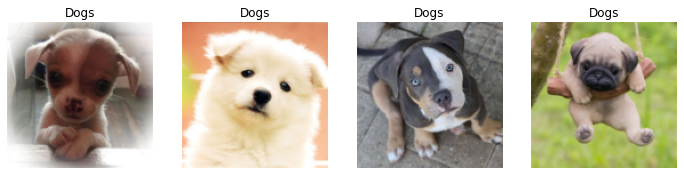

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


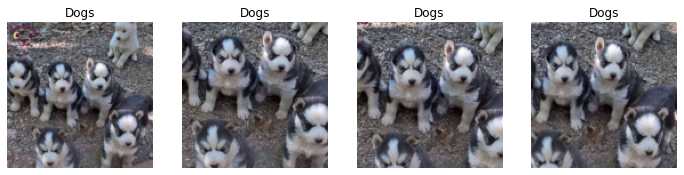

In [14]:
animals = animals.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = animals.dataloaders(root)
dls.train.show_batch(max_n=4,nrows=1,unique=True)


### Batch Transform

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


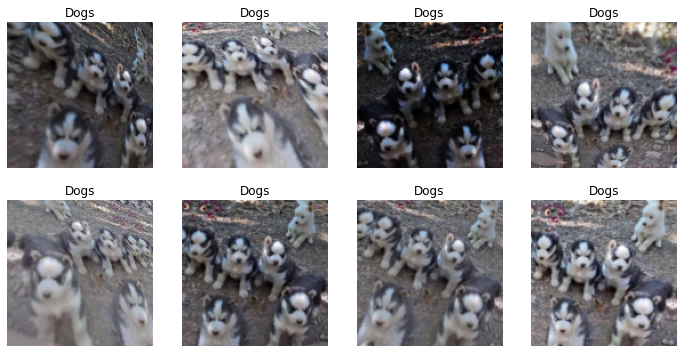

In [15]:
animals = animals.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = animals.dataloaders(root)
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [16]:
animals = animals.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animals.dataloaders(root)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.557585,0.285494,0.116667,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.146878,0.186675,0.091667,00:06
1,0.088350,0.156874,0.066667,00:05
2,0.065272,0.114239,0.058333,00:05
3,0.064609,0.111406,0.050000,00:05


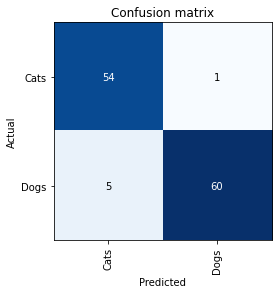

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

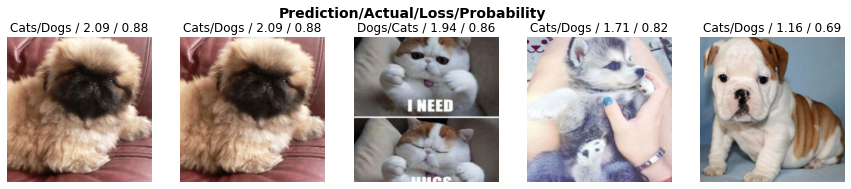

In [20]:
interp.plot_top_losses(5, nrows=1)

In [23]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [24]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [33]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [25]:
btn_upload = widgets.FileUpload()

In [26]:
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
 img = PILImage.create(btn_upload.data[-1])

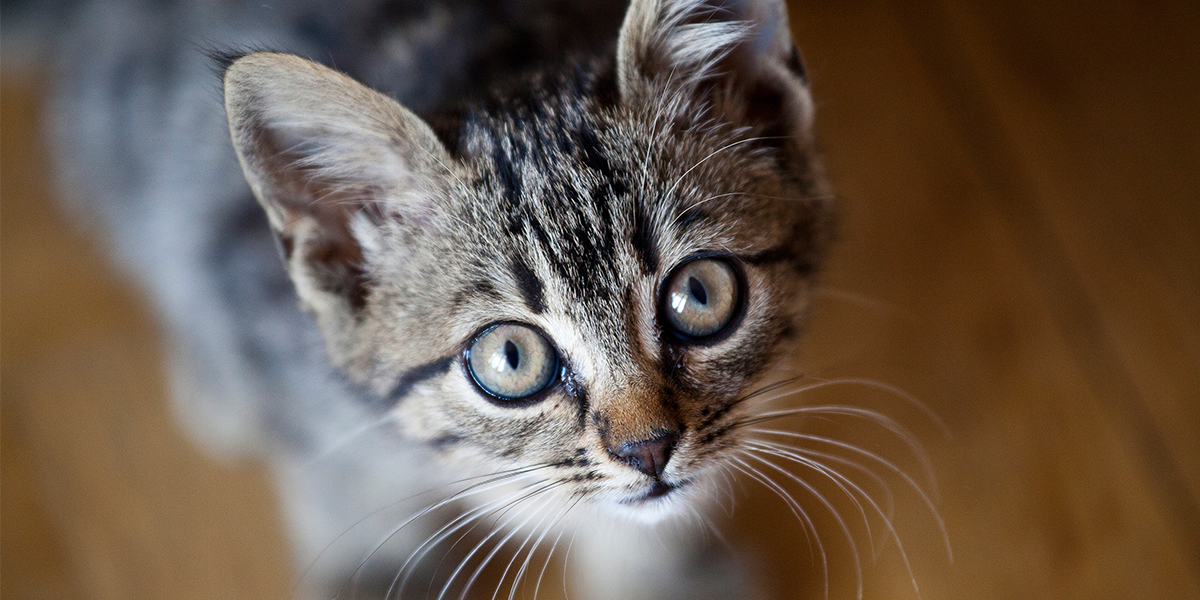

In [29]:
img

In [30]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))

In [31]:
out_pl

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<PIL.Image.Image image mode=RGB size=1…

In [41]:
pred,pred_idx,probs = learn_inf.predict(img)

In [42]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Cats; Probability: 0.5094')

In [43]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [44]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [45]:
btn_upload = widgets.FileUpload()

In [48]:
VBox([widgets.Label('Is your animal a cat or a dog ? we shall see !'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [47]:
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: C:\Users\shaan\anaconda3\envs\plswork\etc\jupyter
    - Validating...
      voila 0.2.7 ok
